# Практическая работа №1: Исследование двумерного нормального распределения

Выполнил студент гр. 2364 Данковцев Артём Алексеевич. Вариант №4

## Цель работы

Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения

Случайный вектор $ \overline\xi(\xi_1, ... , \xi_n)^{\intercal}: \Omega \rightarrow \mathbb{R}$ имеет многомерное нормальное распределение, если существует вектор независимых стандартных нормальных случайных величин $ \zeta = (\zeta_1, ..., \zeta_m)^{\intercal} $, вещественный вектор $ \mu = (\mu_1, ...,\mu_n)^{\intercal} $ и не нулевая матрица А размера n на m, такие, что $ \xi = A\zeta+\mu $

Плотность нормального случайного вектора:
$$ p_\overline\xi(x_1, ... , x_n) = \cfrac{1}{(2\pi)^{\cfrac{n}{2}}\sqrt{det\Sigma}} exp \left( -\cfrac{1}{2} (\overline x - \mu)^{\intercal} \Sigma^{-1} (\overline x - \mu) \right)$$

Корреляция:
$$ \rho(\xi,\eta) = \cfrac{\mathop{\mathrm{cov}}\nolimits(\xi, \eta)}{\sqrt{\mathbb{D}_\xi \cdot \mathbb{D}_\eta}} $$

Проверка корректности найденного ортогонального преобразования:
$$ \Sigma_{id} = Q \Sigma Q^{\intercal} = \begin{pmatrix} \cfrac{1}{\lambda_1} & 0 \\0 & \cfrac{1}{\lambda_2} \end{pmatrix} $$

Проверка корректности найденного аффинного преобразования:
$$ Var(\overline\eta) = A \Sigma A^{\intercal} = \begin{pmatrix} 1 & 0 \\0 & 1 \end{pmatrix} $$

Условное распределение $\xi$ при условии $\eta$:
$$p_{\xi|\eta = y_0}(x) = \frac{p_{\xi,\eta}(x,y_0)}{p_\eta(y_0)}$$



## Постановка задачи

Плотность двумерного нормального распределения имеет вид: 

$$ p_{\xi,\eta}(x,y) = C \cdot exp \left( -\cfrac{1}{2}(3x^2-4xy+6y^2-10x+16y+13) \right)$$

Для заданного двумерного нормального вектора необходимо вычислить числовые характеристики и выполнить заданные преобразования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задача 1

Вычислить вектор математических ожиданий и ковариационные характеристики данного случайного вектора. Построить график плотности распределения $p_{\xi,\eta}$.

##### Решение:

Преобразуем выражение во внутренних скобках:

$$ 3x^2-4xy+6y^2-10x+16y+13 = \cfrac{1}{3}(3x-2y-5)^2 + \cfrac{14}{3}(y+1)^2 = 3(x-1)^2 - 4(x-1)(y+1) +6(y+1)^2$$

По полученному выражению найдем характеристики данного случайного вектора и коэффициент C:

$ \mathbb{E} \begin{pmatrix} \xi \\ \eta \end{pmatrix}  = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$

$ \Sigma^{-1}= \begin{pmatrix} 3 & -2 \\-2 & 6 \end{pmatrix}$

$ \Sigma = \cfrac{1}{14} \begin{pmatrix} 6 & 2 \\2 & 3 \end{pmatrix}$

$ \mathbb{D}\xi = \cfrac{3}{7} $

$ \mathbb{D}\eta = \cfrac{3}{14} $

$ \mathop{\mathrm{cov}}\nolimits(\xi, \eta) = \cfrac{1}{7} $

$ \rho(\xi,\eta) = \cfrac{\mathop{\mathrm{cov}}\nolimits(\xi, \eta)}{\sqrt{\mathbb{D}_\xi \cdot \mathbb{D}_\eta}} = \cfrac{1}{7\sqrt{\cfrac{3}{7} \cdot \cfrac{3}{14}}} = \cfrac{\sqrt{2}}{3}$

При n равном 2:

$ C =  \cfrac{1}{(2\pi)^{\cfrac{n}{2}}\sqrt{det\Sigma}} = \cfrac{1}{2\pi \sqrt{\cfrac{1}{14}}} = \cfrac{\sqrt{14}}{2\pi}$

Получаем функцию плотности распределения $p_{\xi,\eta}$:

$$ p_{\xi,\eta}(x,y) = \cfrac{\sqrt{14}}{2\pi} \cdot exp \left( -\cfrac{1}{2}\left(\cfrac{1}{3}(3x-2y-5)^2 + \cfrac{14}{3}(y+1)^2\right) \right)$$

График функции представлен ниже:

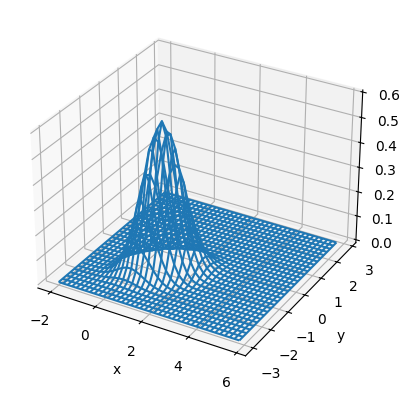

In [1]:
import numpy 
import matplotlib.pyplot
from math import pi, e, sqrt
x = numpy.arange(-2, 6, 0.2)
y = numpy.arange(-3, 3, 0.2)
xgrid, ygrid = numpy.meshgrid(x, y)
zgrid =  sqrt(14) / (2 * pi) * e ** (-0.5 * (1/3 * (3 * xgrid - 2 * ygrid - 5) ** 2 + 14/3 * (1 * ygrid + 1) ** 2)) 
fig = matplotlib.pyplot.figure()
ax = matplotlib.pyplot.axes(projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot_wireframe(xgrid, ygrid, zgrid)
matplotlib.pyplot.show()

### Задача 2

Найти аффинное преобразование, переводящее иcходный случайный вектор в стандартный нормальный.

##### Решение:

$$ \begin{pmatrix} x \\ y \end{pmatrix} = \mu \begin{pmatrix} U \\ V \end{pmatrix} + \begin{pmatrix} \alpha \\ \beta \end{pmatrix} $$

Преобразуем выражение во внутренних скобках:

$\cfrac{1}{3}(3x-2y-5)^2 + \cfrac{14}{3}(y+1)^2 = \left(\sqrt{3}x-\cfrac{2\sqrt{3}}{3}y-\cfrac{5\sqrt{3}}{3}\right)^2 + \left(\cfrac{\sqrt{42}}{3}y+\cfrac{\sqrt{42}}{3}\right)^2$

$ \begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = \begin{pmatrix} \sqrt{3} & -\cfrac{2\sqrt{3}}{3} \\0 & \cfrac{\sqrt{42}}{3} \end{pmatrix} \begin{pmatrix} \xi \\ \eta \end{pmatrix} + \begin{pmatrix} -\cfrac{5\sqrt{3}}{3} \\ \cfrac{\sqrt{42}}{3} \end{pmatrix} = \begin{pmatrix} \sqrt{3}\xi-\cfrac{2\sqrt{3}}{3}\eta-\cfrac{5\sqrt{3}}{3} \\ \cfrac{\sqrt{42}}{3}\eta+\cfrac{\sqrt{42}}{3}\end{pmatrix}$

$ \overline\eta = A\overline\xi + b, \xi \sim \mathcal{N}(\mu, \Sigma) $

$ \mathbb{E}\overline\eta = A\mu + b$

$ \mathbb{E}\begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = \begin{pmatrix} \sqrt{3} & -\cfrac{2\sqrt{3}}{3} \\0 & \cfrac{\sqrt{42}}{3} \end{pmatrix} \begin{pmatrix} 1 \\ -1 \end{pmatrix} + \begin{pmatrix} -\cfrac{5\sqrt{3}}{3} \\ \cfrac{\sqrt{42}}{3} \end{pmatrix} = \begin{pmatrix} \sqrt{3}+\cfrac{2\sqrt{3}}{3}-\cfrac{5\sqrt{3}}{3} \\ -\cfrac{\sqrt{42}}{3}+\cfrac{\sqrt{42}}{3}\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

Проверка корректности найденного аффинного преобразования:
$$ Var(\overline\eta) = A \Sigma A^{\intercal} = \begin{pmatrix} 1 & 0 \\0 & 1 \end{pmatrix} $$

$ \Sigma_* = \cfrac{1}{14} \begin{pmatrix} \sqrt{3} & -\cfrac{2\sqrt{3}}{3} \\0 & \cfrac{\sqrt{42}}{3} \end{pmatrix} \begin{pmatrix} 6 & 2 \\2 & 3 \end{pmatrix} \begin{pmatrix} \sqrt{3} & 0 \\-\cfrac{2\sqrt{3}}{3} & \cfrac{\sqrt{42}}{3} \end{pmatrix} = \cfrac{1}{14} \begin{pmatrix} \cfrac{14\sqrt{3}}{3} & 0 \\ \cfrac{2\sqrt{42}}{3} & \cfrac{3\sqrt{42}}{3} \end{pmatrix}  \begin{pmatrix} \sqrt{3} & 0 \\-\cfrac{2\sqrt{3}}{3} & \cfrac{\sqrt{42}}{3} \end{pmatrix} = \cfrac{1}{14} \begin{pmatrix} 14 & 0 \\ 0 & 14 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$

### Задача 3

Найти ортогональное преобразование, переводящее соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Построить график плотности полученного распределения.

##### Решение:

$$ det (\Sigma^{-1} -\lambda E) = 0 $$

$ det \begin{pmatrix} 3-\lambda & -2 \\ -2 & 6-\lambda \end{pmatrix} = (3-\lambda)(6-\lambda) - 4 = \lambda^2 - 9\lambda + 14 = 0$

$ \begin{cases} \lambda_1 = 2\\ \lambda_2 = 7 \end{cases} $

Для $\lambda = 2$:

$ (\Sigma^{-1} -\lambda E)_1 = \begin{pmatrix} 1 & -2 \\ -2 & 4 \end{pmatrix} $

$ \begin{cases} x-2y=0\\ -2x+4y=0 \end{cases} $

$ \overline U_1 = \alpha \begin{pmatrix} 2 \\ 1  \end{pmatrix}$

$ \alpha = \cfrac{1}{\sqrt{2^2+1^2}} = \cfrac{1}{\sqrt{5}}$

$ \overline U_1 = \cfrac{1}{\sqrt{5}} \begin{pmatrix} 2 \\ 1  \end{pmatrix}$

Для $\lambda = 7$:

$ (\Sigma^{-1} -\lambda E)_2 = \begin{pmatrix} -4 & -2 \\ -2 & -1 \end{pmatrix} $

$ \begin{cases} -4x-2y=0\\ -2x-y=0 \end{cases} $

$ \overline U_2 = \alpha \begin{pmatrix} 1 \\ -2  \end{pmatrix}$

$ \alpha = \cfrac{1}{\sqrt{1^2+(-2)^2}} = \cfrac{1}{\sqrt{5}}$

$ \overline U_2 = \cfrac{1}{\sqrt{5}} \begin{pmatrix} 1 \\ -2  \end{pmatrix}$

$ Q^{\intercal} = \cfrac{1}{\sqrt{5}} \begin{pmatrix} 1 & 2 \\ -2 & 1 \end{pmatrix} $

$ Q = \cfrac{1}{\sqrt{5}} \begin{pmatrix} 1 & -2 \\ 2 & 1 \end{pmatrix} $

Найдем новую сигму:

$$ \Sigma_{id} = Q \Sigma Q^{\intercal} = \begin{pmatrix} \cfrac{1}{\lambda_1} & 0 \\0 & \cfrac{1}{\lambda_2} \end{pmatrix} $$

$ \Sigma_{id} = \cfrac{1}{14\cdot5} \begin{pmatrix} 1 & -2 \\2 & 1 \end{pmatrix} \begin{pmatrix} 6 & 2 \\2 & 3 \end{pmatrix} \begin{pmatrix} 1 & 2 \\-2 & 1 \end{pmatrix} = \cfrac{1}{14\cdot5} \begin{pmatrix} 2 & -4 \\14 & 7 \end{pmatrix} \begin{pmatrix} 1 & 2 \\-2 & 1 \end{pmatrix} = \cfrac{1}{14\cdot5} \begin{pmatrix} 10 & 0 \\0 & 35 \end{pmatrix} = \begin{pmatrix} \cfrac{1}{7} & 0 \\0 & \cfrac{1}{2} \end{pmatrix}$

Найдем плотность распределения для n равного 2:

$$ p_\overline\xi(x_1, ... , x_n) = \cfrac{1}{(2\pi)^{\cfrac{n}{2}}\sqrt{det\Sigma_{id}}} exp \left( -\cfrac{1}{2} (\overline x - \mu)^{\intercal} \Sigma^{-1}_{id} (\overline x - \mu) \right)$$

$ det\Sigma_{id}= \cfrac{1}{14} $

$ \Sigma^{-1}_{id}= \begin{pmatrix} 7 & 0 \\0 & 2 \end{pmatrix} $

$ \mathbb{E} \begin{pmatrix} \xi \\ \eta \end{pmatrix} = Q \cdot \overline\mu = \cfrac{1}{\sqrt{5}} \begin{pmatrix} 1 & -2 \\ 2 & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 \\-1 \end{pmatrix} = \cfrac{1}{\sqrt{5}} \begin{pmatrix} 3 \\ 1 \end{pmatrix} $

Найдем константу:

$ \cfrac{1}{(2\pi)\sqrt{\cfrac{1}{14}}} = \cfrac{\sqrt{14}}{2\pi}$

Найдем выражение в скобках:

$ \begin{pmatrix} x-\cfrac{3}{\sqrt{5}} & y-\cfrac{1}{\sqrt{5}} \end{pmatrix} \begin{pmatrix} 7 & 0 \\0 & 2 \end{pmatrix} \begin{pmatrix} x-\cfrac{3}{\sqrt{5}} \\ y-\cfrac{1}{\sqrt{5}} \end{pmatrix} = \begin{pmatrix} 7\left(x-\cfrac{3}{\sqrt{5}}\right) & 2\left(y-\cfrac{1}{\sqrt{5}}\right) \end{pmatrix} \begin{pmatrix} x-\cfrac{3}{\sqrt{5}} \\ y-\cfrac{1}{\sqrt{5}} \end{pmatrix} = 7\left(x-\cfrac{3}{\sqrt{5}}\right)^2 + 2\left(y-\cfrac{1}{\sqrt{5}}\right)^2$

Получаем функцию плотности распределения $p_{\xi,\eta}$:

$$ p_{\xi,\eta}(x,y)_{id} = \cfrac{\sqrt{14}}{2\pi} \cdot exp \left( -\cfrac{1}{2}\left( 7\left(x-\cfrac{3}{\sqrt{5}}\right)^2 + 2\left(y-\cfrac{1}{\sqrt{5}}\right)^2 \right)  \right)$$

График функции представлен ниже:

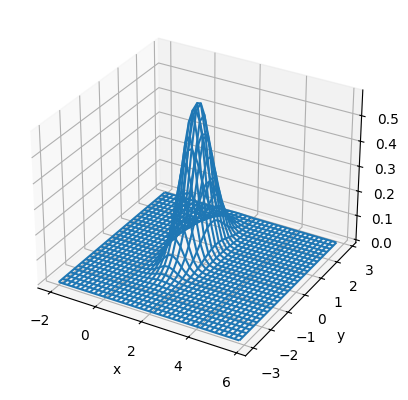

In [2]:
import numpy 
import matplotlib.pyplot
from math import pi, e, sqrt
x = numpy.arange(-2, 6, 0.2)
y = numpy.arange(-3, 3, 0.2)
xgrid, ygrid = numpy.meshgrid(x, y)
zgrid =  sqrt(14) / (2 * pi) * e ** (-0.5 * (7 * (1 * xgrid - 3/sqrt(5)) ** 2 + 2 * (1 * ygrid - 1/sqrt(5)) ** 2)) 
fig = matplotlib.pyplot.figure()
ax = matplotlib.pyplot.axes(projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot_wireframe(xgrid, ygrid, zgrid)
matplotlib.pyplot.show()

### Задача 4

Вычислить характеристики совместного распределения случайного векторa $ (-5\xi + 4\eta, \xi - 4\eta)^{\intercal} $ и записать его плотность. Построить график плотности полученного распределения.

##### Решение:

$ \overline V = \begin{pmatrix} -5\xi + 4\eta \\ \xi - 4\eta \end{pmatrix} = \begin{pmatrix} -5 & 4 \\1 & -4 \end{pmatrix} \begin{pmatrix} \xi \\ \eta \end{pmatrix} + \begin{pmatrix} 0 \\ 0 \end{pmatrix} $

Найдем характеристики совместного распределения:

$ \mathbb{E} \begin{pmatrix} \xi \\ \eta \end{pmatrix}  = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$

$ \mathbb{E}_{\overline V} \begin{pmatrix} \xi \\ \eta \end{pmatrix}  = \begin{pmatrix} -5 & 4 \\ 1 & -4 \end{pmatrix} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} -9 \\ 5 \end{pmatrix} $

$$ Var = A \Sigma A^{\intercal} $$

$ A = \begin{pmatrix} -5 & 4 \\ 1 & -4 \end{pmatrix} $

$ \Sigma = \cfrac{1}{14} \begin{pmatrix} 6 & 2 \\ 2 & 3 \end{pmatrix} $

$ Var = \cfrac{1}{14} \begin{pmatrix} -5 & 4 \\ 1 & -4 \end{pmatrix} \begin{pmatrix} 6 & 2 \\ 2 & 3 \end{pmatrix} \begin{pmatrix} -5 & 1 \\ 4 & -4 \end{pmatrix} = \cfrac{1}{14} \begin{pmatrix} -22 & 2 \\ -2 & -10 \end{pmatrix} \begin{pmatrix} -5 & 1 \\ 4 & -4 \end{pmatrix} = \begin{pmatrix} \cfrac{118}{14} & -\cfrac{30}{14} \\ -\cfrac{30}{14} & \cfrac{38}{14} \end{pmatrix}$

$ det (Var) = \cfrac{128}{7} $

$ (Var)^{-1} = \begin{pmatrix} \cfrac{19}{128} & \cfrac{15}{128} \\ \cfrac{15}{128} & \cfrac{59}{128} \end{pmatrix} $

$ \mathbb{D}(-5\xi + 4\eta) = \cfrac{118}{14} $

$ \mathbb{D}(\xi - 4\eta) = \cfrac{38}{14} $

$ \mathop{\mathrm{cov}}\nolimits(-5\xi + 4\eta, \xi - 4\eta) = -\cfrac{30}{14} $ 

$ \rho(-5\xi + 4\eta, \xi - 4\eta) = \cfrac{\mathop{\mathrm{cov}}\nolimits(-5\xi + 4\eta, \xi - 4\eta)}{\sqrt{\mathbb{D}_{-5\xi + 4\eta} \cdot \mathbb{D}_{\xi - 4\eta}}} = -\cfrac{30}{14\sqrt{\cfrac{118}{14} \cdot \cfrac{38}{14}}} = -\cfrac{15\sqrt{1121}}{1121}$

Найдем плотность распределения для n равного 2:

$$ p_\overline\xi(x_1, ... , x_n) = \cfrac{1}{(2\pi)^{\cfrac{n}{2}}\sqrt{det(Var)}} exp \left( -\cfrac{1}{2} (\overline x - \mu)^{\intercal} (Var)^{-1} (\overline x - \mu) \right)$$

$ \mathbb{E} \begin{pmatrix} \xi \\ \eta \end{pmatrix}= \begin{pmatrix} 1 \\-1 \end{pmatrix} $

Найдем константу:

$ \cfrac{1}{(2\pi)\sqrt{\cfrac{128}{7}}} = \cfrac{\sqrt{14}}{32\pi}$

Найдем выражение в скобках:

$ \cfrac{1}{128}\begin{pmatrix} x-1 & y+1 \end{pmatrix} \begin{pmatrix} 19 & 15 \\15 & 59 \end{pmatrix} \begin{pmatrix} x-1 \\ y+1 \end{pmatrix} = \cfrac{1}{128} \begin{pmatrix} 19x-4+15y & 15x+44+59y \end{pmatrix} \begin{pmatrix} x-1 \\ y+1 \end{pmatrix} = \cfrac{1}{128} (19x^2-8x+48+30xy+88y+59y^2) = $

$= \cfrac{1}{128} \left(\cfrac{1}{19}(19x+15y-4)^2 + \cfrac{896}{19}(y+1)^2\right) $

Получаем функцию плотности распределения $p_{\xi,\eta}$:

$$ p_{\xi,\eta}(x,y)_{Var} = \cfrac{\sqrt{14}}{32\pi} \cdot exp \left( -\cfrac{1}{256}\left(\cfrac{1}{19}(19x+15y-4)^2 + \cfrac{896}{19}(y+1)^2\right) \right)$$

График функции представлен ниже:

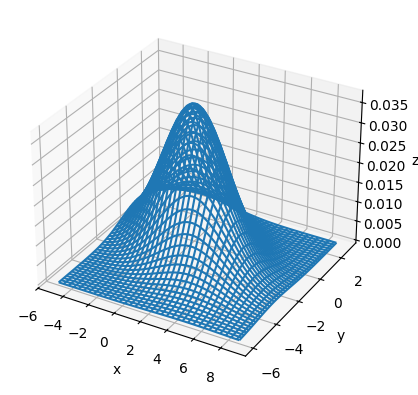

In [3]:
import numpy 
import matplotlib.pyplot
from math import pi, e, sqrt
x = numpy.arange(-5, 9, 0.2)
y = numpy.arange(-6, 3, 0.2)
xgrid, ygrid = numpy.meshgrid(x, y)
zgrid =  sqrt(14) / (32 * pi) * e ** (-(1)/(256) * (1/19 * (19 * xgrid + 15 * ygrid - 4) ** 2 + 896/19 * (1 * ygrid + 1) ** 2)) 
fig = matplotlib.pyplot.figure()
ax = matplotlib.pyplot.axes(projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot_wireframe(xgrid, ygrid, zgrid)
matplotlib.pyplot.show()

### Задача 5

Найти условное распределение $\xi$ при условии $\eta$. Вычислить $ \mathbb{E}(\xi|\eta) $ и $ \mathbb{D}(\xi|\eta) $.

##### Решение:

Условное распределение $\xi$ при условии $\eta$:
$$p_{\xi|\eta = y_0}(x) = \frac{p_{\xi,\eta}(x,y_0)}{p_\eta(y_0)}$$

$$p_{\eta}(y_0) = \frac{1}{\sigma\sqrt{2\pi}} exp \left( -\frac{1}{2} \left( \frac{y_0-\mu}{\sigma} \right)^2 \right)$$

$ \mathbb{D}\eta = \cfrac{3}{14}$

$ \mathbb{D}\eta = \sigma^2 = \cfrac{3}{14}$

$ \sigma = \cfrac{\sqrt{3}}{\sqrt{14}}$

$ \mathbb{E}\eta = -1 = \mu $

$p_{\eta}(y_0) = \frac{\sqrt{7}}{\sqrt{3\pi}} exp \left( -\frac{1}{2} \left(\cfrac{14}{3}y^2_0+\cfrac{28}{3}y_0+\cfrac{14}{3}\right) \right)$

$p_{\xi|\eta = y_0}(x) = \cfrac{\sqrt{14\cdot3\pi}}{2\pi\sqrt{7}} exp \left( -\frac{1}{2}\left(3x^2-4xy_0+\cfrac{4}{3}y^2_0-10x+\cfrac{20}{3}y_0+\cfrac{25}{3}\right) \right) = \cfrac{\sqrt{3}}{\sqrt{2\pi}} exp \left( -\frac{1}{2}\left(3x^2-4xy_0+\cfrac{4}{3}y^2_0-10x+\cfrac{20}{3}y_0+\cfrac{25}{3}\right) \right)$

$ \frac{1}{\sigma\sqrt{2\pi}} =  \cfrac{\sqrt{3}}{\sqrt{2\pi}}$

$ \sigma = \cfrac{1}{\sqrt{3}}$

$ \mathbb{D}(\xi|\eta) = \sigma^2 = \frac{1}{3} $

С выражением в скобках можно поработать и прийти к следующему виду:

$3x^2-4xy_0+\cfrac{4}{3}y^2_0-10x+\cfrac{20}{3}y_0+\cfrac{25}{3} = 3\left(x^2-2x \left( \cfrac{2}{3}y_0 + \cfrac{5}{3} \right)+ \left( \cfrac{2}{3}y_0 + \cfrac{5}{3} \right)^2 \right) = \cfrac{\left( x - \left( \cfrac{2}{3}y_0 + \cfrac{5}{3} \right) \right)^2}{\cfrac{1}{3}}$

$p_{\xi|\eta = y_0}(x) = \cfrac{\sqrt{3}}{\sqrt{2\pi}} exp \left( -\frac{1}{2}\left( \cfrac{\left( x - \left( \cfrac{2}{3}y_0 + \cfrac{5}{3} \right) \right)^2}{\cfrac{1}{3}}\right) \right)$

$ \mathbb{E}(\xi|\eta) = \left( \cfrac{2}{3}y_0 + \cfrac{5}{3} \right) $

## Выводы

В результате проделанной работы для данного двумерного нормального вектора найдены необходимые числовые характеристики и выполнены аффинное и ортогональное преобразования, которые переводят случайный вектор в стандартный нормальный и в вектор с независимыми компонентами соответственно. На основе полученных данных построены трехмерные графики найденных распределений. В ходе работы возникли трудности с нахождением условного распределения, которые были преодолены тщательным изучением законспектированных материалов. Цель работы и поставленные задачи выполнены.